In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv("Data\Q1\communities.csv", na_values="?")


In [3]:
df.head()

,state,county,community,communityname string,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,NaN,NaN,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,NaN,NaN,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,24,NaN,NaN,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,34,5.0,81440.0,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,42,95.0,6096.0,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [4]:
df.columns

Index([' state ', ' county ', ' community ', ' communityname string', ' fold ',
       ' population ', ' householdsize ', ' racepctblack ', ' racePctWhite ',
       ' racePctAsian ',
       ...
       ' LandArea ', ' PopDens ', ' PctUsePubTrans ', ' PolicCars ',
       ' PolicOperBudg ', ' LemasPctPolicOnPatr ', ' LemasGangUnitDeploy ',
       ' LemasPctOfficDrugUn ', ' PolicBudgPerPop ', ' ViolentCrimesPerPop '],
      dtype='object', length=128)

In [5]:
df1 = df.drop([' state ', ' county ', ' community ',
               ' communityname string', ' fold '], axis="columns")
df1.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,NaN,NaN,NaN,NaN,0.00,NaN,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,NaN,NaN,NaN,NaN,0.00,NaN,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,NaN,NaN,NaN,NaN,0.00,NaN,0.03


In [6]:
df1.shape

(1994, 123)

In [7]:
np.sum(df1.isna())


 population                 0
 householdsize              0
 racepctblack               0
 racePctWhite               0
 racePctAsian               0
                         ... 
 LemasPctPolicOnPatr     1675
 LemasGangUnitDeploy     1675
 LemasPctOfficDrugUn        0
 PolicBudgPerPop         1675
 ViolentCrimesPerPop        0
Length: 123, dtype: int64

In [8]:
threshold = 300
to_remove = []

for column in df1.columns:
    na_count = np.sum(df1[column].isna())
    if na_count > 300:
        to_remove.append(column)


print(len(to_remove))  
print(to_remove)

22
[' LemasSwornFT ', ' LemasSwFTPerPop ', ' LemasSwFTFieldOps ', ' LemasSwFTFieldPerPop ', ' LemasTotalReq ', ' LemasTotReqPerPop ', ' PolicReqPerOffic ', ' PolicPerPop ', ' RacialMatchCommPol ', ' PctPolicWhite ', ' PctPolicBlack ', ' PctPolicHisp ', ' PctPolicAsian ', ' PctPolicMinor ', ' OfficAssgnDrugUnits ', ' NumKindsDrugsSeiz ', ' PolicAveOTWorked ', ' PolicCars ', ' PolicOperBudg ', ' LemasPctPolicOnPatr ', ' LemasGangUnitDeploy ', ' PolicBudgPerPop ']


In [9]:
df2 = df1.drop(to_remove,axis="columns")
df2.shape

(1994, 101)

In [10]:
df3 = df2.dropna(axis=0)
df3.head(3)

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,LemasPctOfficDrugUn,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43


(array([679., 470., 304., 154.,  97., 107.,  66.,  26.,  33.,  57.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

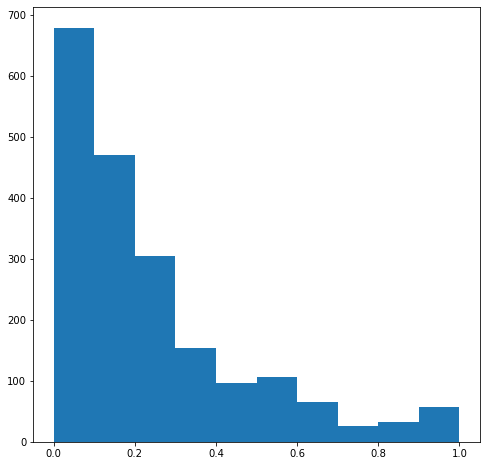

In [11]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1,1,1)
ax.hist(df3[' ViolentCrimesPerPop '])


Text(0, 0.5, 'Population Size')

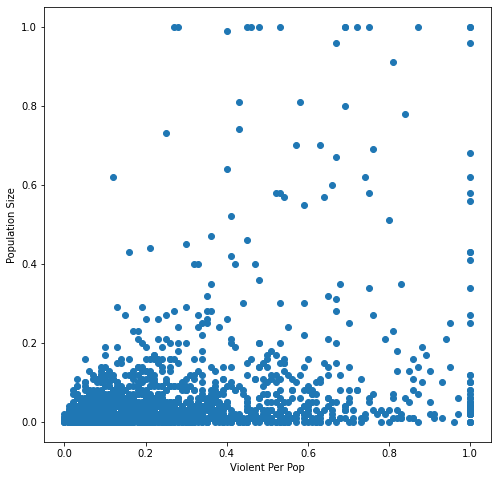

In [12]:
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df3[' ViolentCrimesPerPop '], df3[' population '])
ax.set_xlabel("Violent Per Pop")
ax.set_ylabel("Population Size")


In [13]:
from sklearn.model_selection import train_test_split

In [18]:
X = df3.drop(' ViolentCrimesPerPop ',axis = 1)
y = df3[' ViolentCrimesPerPop ']


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, train_size=0.8, random_state=1)


In [34]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1594, 100)
(200, 100)
(1594,)
(200,)


In [29]:
X_val, X_test,y_val, y_test = train_test_split(X_test,y_test, test_size = 0.5, random_state = 1)

In [35]:
print(X_val.shape)
print(X_test.shape)
print(y_val.shape)
print(y_test.shape)


(199, 100)
(200, 100)
(199,)
(200,)


In [36]:
from sklearn.linear_model import LinearRegression

In [38]:
model = LinearRegression().fit(X=X_train,y=y_train)

In [49]:
print("Linear Regression R-squared score:",model.score(X=X_train,y=y_train))

Linear Regression R-squared score: 0.712592235177602


In [44]:
from sklearn.metrics import mean_squared_error

In [71]:
y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred)
print("Linear regression mean_squared_error is:",rmse)


Linear regression mean_squared_error is: 0.02468422729517076


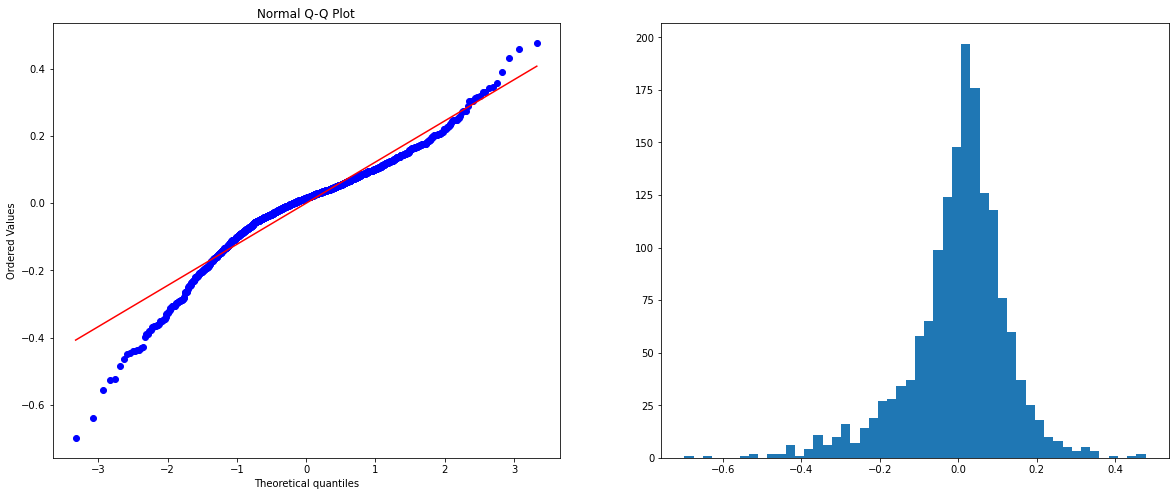

In [86]:
import scipy.stats as stats
def plot_residual(X,Y,model):
    residuals = model.predict(X) - Y
    fig = plt.figure(figsize=[20, 8])
    ax = fig.add_subplot(1, 2, 1)
    stats.probplot(residuals, dist="norm", plot=ax)
    ax.set_title("Normal Q-Q Plot")
    ax = fig.add_subplot(1, 2, 2)
    ax.hist(residuals, bins = 50)

plot_residual(X_train,y_train,model)


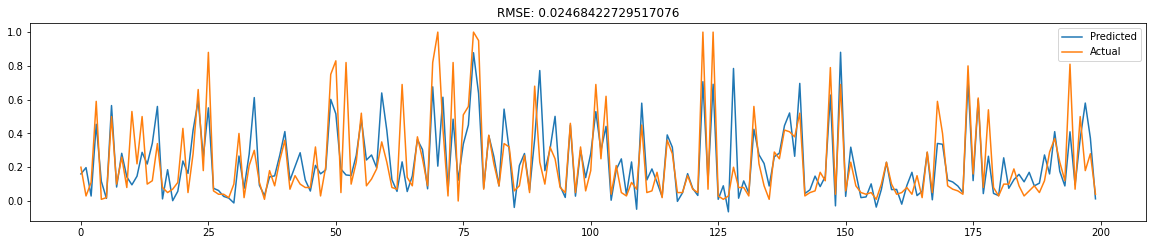

In [83]:
def plot_accuracy(y_pred,y_true):
    rmse = mean_squared_error(y_true,y_pred)
    fig = plt.figure(figsize=[20,8])
    ax=fig.add_subplot(2,1,1)
    ax.plot(np.arange(len(y_pred)),y_pred,label="Predicted" )
    ax.plot(np.arange(len(y_true)),y_true,label="Actual")
    ax.set_title("RMSE: "+str(rmse))
    ax.legend()

plot_accuracy(y_pred, y_test)
    


In [85]:
from sklearn.linear_model import Ridge
model_ridge = Ridge().fit(X_train,y_train)

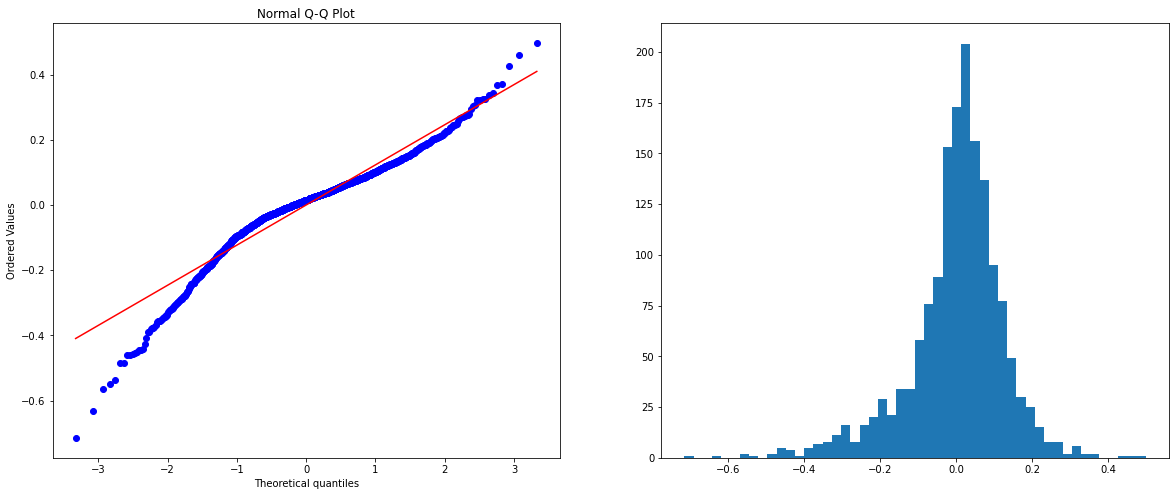

In [87]:
plot_residual(X_train,y_train,model_ridge)

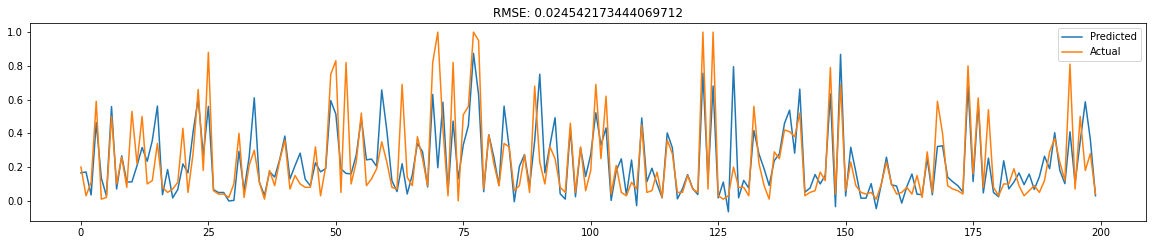

In [89]:
y_pred_ridge = model_ridge.predict(X_test)
plot_accuracy(y_pred_ridge,y_test)

In [91]:
print("Ridge Regression R squared score:", model_ridge.score(X_train,y_train))

Ridge Regression R squared score: 0.7069922137327497


In [92]:
lambdas = np.arange(0,500,2)
rmse_val = []

for i in lambdas:
    model_ridge_filter = Ridge(alpha = i).fit(X_train,y_train)
    pred = model_ridge_filter.predict(X_val)
    rmse_i = mean_squared_error(pred,y_val)
    rmse_val.append(rmse_i)


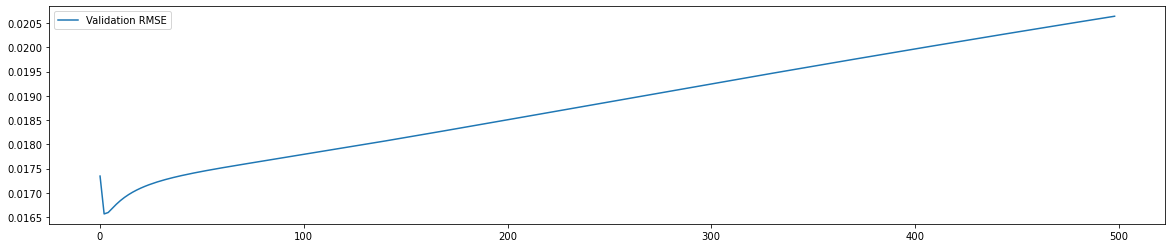

In [98]:
fig = plt.figure(figsize=[20,4])
ax=fig.add_subplot(1,1,1)
ax.plot(lambdas,rmse_val,label="Validation RMSE")
ax.legend();

In [102]:
best_lambda = lambdas[np.argmin(rmse_val)]
print("Best Lambda is",best_lambda,"with RMSE of",rmse_val[np.argmin(rmse_val)])
model_ridge_best = Ridge(alpha=best_lambda).fit(X_train,y_train)

Best Lambda is 2 with RMSE of 0.016568009866567264


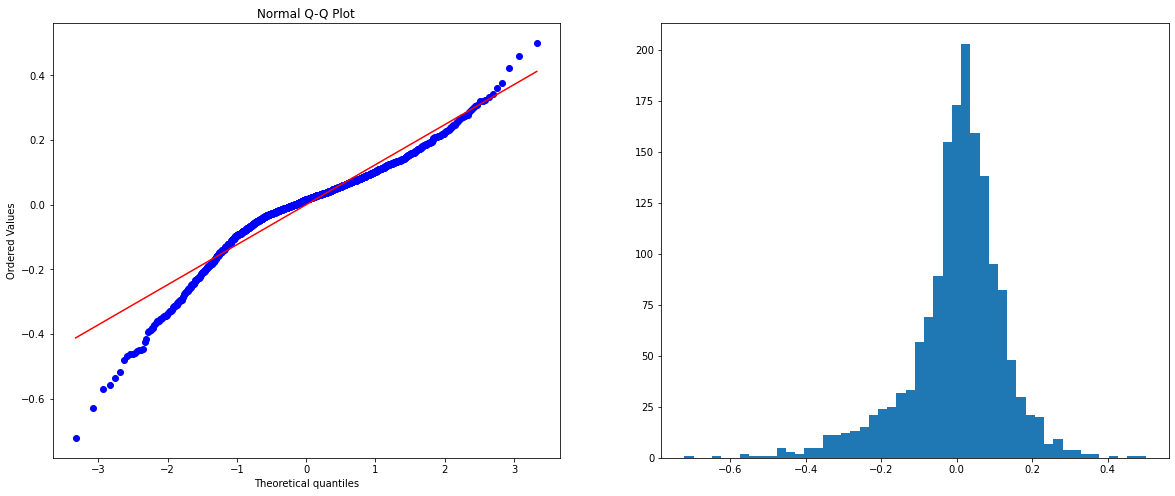

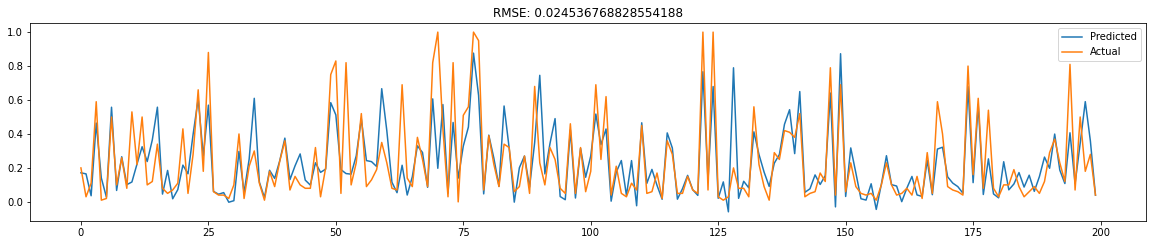

In [101]:
ridge_best_pred = model_ridge_best.predict(X_test)
plot_residual(X_train,y_train,model_ridge_best)
plot_accuracy(ridge_best_pred,y_test)

In [103]:
lambdas = np.arange(0.0, 1, 0.01)
from sklearn.linear_model import Lasso

rmse_val = []
for i in lambdas:
    model_lasso = Lasso(alpha=i).fit(X_train,y_train)
    pred = model_lasso.predict(X_val)
    rmse = mean_squared_error(pred,y_val)
    rmse_val.append(rmse)


<ipython-input-103-f521addb6783>:6: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_lasso = Lasso(alpha=i).fit(X_train,y_train)
C:\Users\Phi Long\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Phi Long\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.59652923364088, tolerance: 0.008765159849435383
  model = cd_fast.enet_coordinate_descent(


In [104]:
best_lambda = lambdas[np.argmin(rmse_val)]
print("Best Lasso lambda is", best_lambda,"with RMSE",rmse_val[np.argmin(rmse_val)])


Best Lasso lambda is 0.0 with RMSE 0.01734966799304635


In [107]:
model_lasso_best = Lasso(alpha=best_lambda).fit(X_train,y_train)

<ipython-input-107-b1d873ba3a28>:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model_lasso_best = Lasso(alpha=best_lambda).fit(X_train,y_train)
C:\Users\Phi Long\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Phi Long\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12.59652923364088, tolerance: 0.008765159849435383
  model = cd_fast.enet_coordinate_descent(


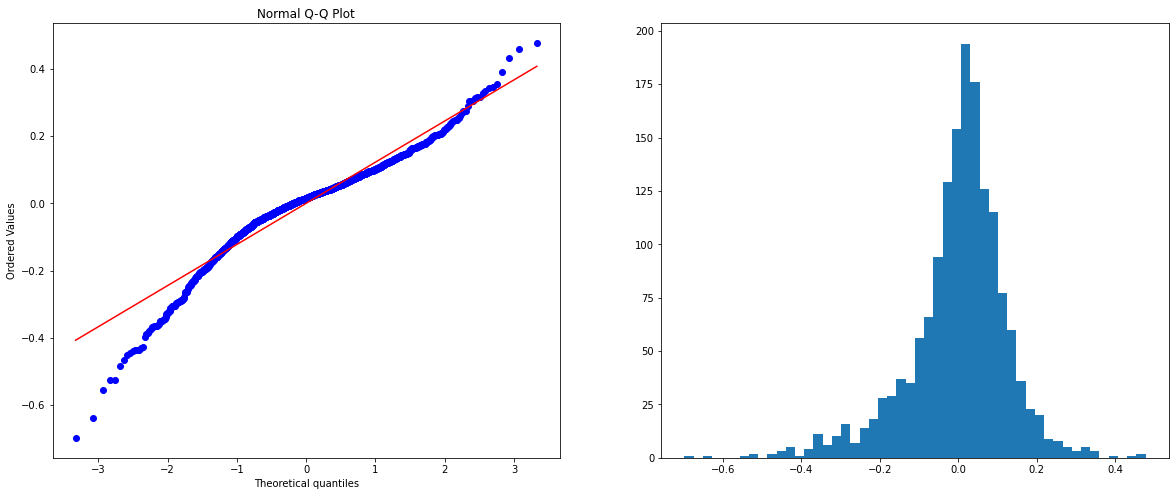

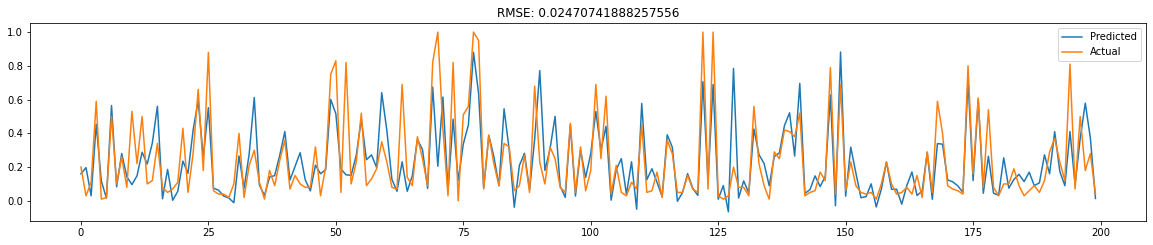

In [108]:
lasso_pred = model_lasso_best.predict(X_test)
plot_residual(X_train,y_train,model_lasso_best)
plot_accuracy(lasso_pred,y_test)

In [109]:
print(mean_squared_error(y_test,lasso_pred))

0.02470741888257556
